In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df = df.drop('id',axis=1)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['month'] = df['date'].apply(lambda date:date.month)

In [7]:
df['year'] = df['date'].apply(lambda date:date.year)

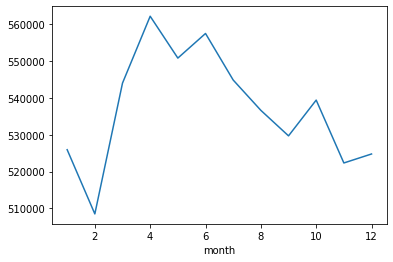

In [8]:
df.groupby('month').mean()['price'].plot();

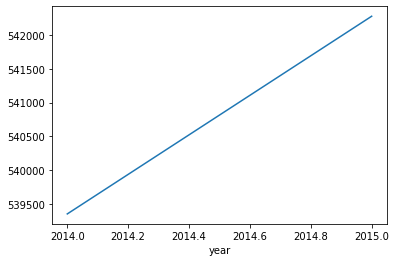

In [9]:
df.groupby('year').mean()['price'].plot();

In [10]:
df = df.drop('date',axis=1)

In [11]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [12]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [13]:
df = df.drop('zipcode',axis=1)

In [14]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

### Train Test Split

In [16]:
X = df.drop('price',axis=1)
y = df['price']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling using RobustScaler

In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
scaler = RobustScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
full_scaler = RobustScaler() 
full_scaler.fit(X)
X = scaler.transform(X)

In [22]:
X_train.shape

(15117, 19)

## Cross Validation if data < 100 k

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [23]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
lin_reg_cvs = LinearRegression()
lin_scores = cross_val_score(lin_reg_cvs, X, y,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [210439.10864539 219848.41150675 190793.62320503 226313.58757206
 187675.54581532 192517.61166216 188711.84585598 197721.9193357
 202102.10612751 212991.24338029]
Mean: 202911.5003106194
Standard deviation: 13072.910881229745


In [26]:
tree_reg_cvs = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg_cvs, X, y,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [181633.73154841 180975.38887313 168012.15063973 188968.22898956
 179859.48211721 208252.84909133 177651.12819195 183451.60726396
 194295.68702296 169613.43029159]
Mean: 183271.36840298306
Standard deviation: 11174.35067345799


In [27]:
forest_reg_cvs = RandomForestRegressor(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_reg_cvs, X, y,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [132932.57864329 138187.35655325 114288.26029755 136752.82103336
 114819.98884888 136486.01246238 142187.81849901 119696.92864635
 124736.21537698 133940.6988398 ]
Mean: 129402.8679200843
Standard deviation: 9669.334750662223


In [ ]:
svm_reg_rbf = SVR(kernel="rbf")
svm_rbf_scores = cross_val_score(svm_reg_rbf, X, y, scoring="neg_mean_squared_error", cv=10)
svm_rbf_rmse_scores = np.sqrt(-svm_rbf_scores)
display_scores(svm_rbf_rmse_scores)

In [ ]:
#svm_reg_cvs = SVR(kernel="linear")
#svm_scores = cross_val_score(svm_reg_cvs, X, y, scoring="neg_mean_squared_error", cv=10)
#svm_rmse_scores = np.sqrt(-svm_scores)
#display_scores(svm_rmse_scores)

In [28]:
print("RMSE of Lnear Regression:", lin_rmse_scores.mean())
print("RMSE of Decision Tree:", tree_rmse_scores.mean())
print("RMSE of Random Forest:", forest_rmse_scores.mean())
print("RMSE of Support Vector (rbf):", svm_rbf_rmse_scores.mean())
#print("RMSE of Support Vector:", svm_rmse_scores.mean())

RMSE of Lnear Regression: 202911.5003106194
RMSE of Decision Tree: 183271.36840298306
RMSE of Random Forest: 129402.8679200843


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [30]:
X.shape

(21597, 19)

In [31]:
from pprint import pprint

## Cross Validation if data >= 100 k

In [36]:
from xgboost import XGBRegressor

In [37]:
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05)

In [38]:
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [41]:
xgb_predictions = xgb_model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
mae = mean_absolute_error(xgb_predictions, y_test)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 63840.53592906057


## Creating a Model with Scikit if data < 100 k

In [46]:
from sklearn.model_selection import GridSearchCV

In [33]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

max_depthint, default=None

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”

    The number of features to consider when looking for the best split:

        If int, then consider max_features features at each split.

        If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

        If “auto”, then max_features=n_features.

        If “sqrt”, then max_features=sqrt(n_features).

        If “log2”, then max_features=log2(n_features).

        If None, then max_features=n_features.

    Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.


In [34]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 4, 8, 10, 12, 14],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [2, 4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  8.0min


In [35]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 71766.2059 degrees.
Accuracy = 86.34%.


In [49]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 74822.9824 degrees.
Accuracy = 85.45%.


In [43]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -1.02%.


### Predicting on a brand new house

In [50]:
single_house = df.drop('price',axis=1).iloc[0]

In [51]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [52]:
single_house

array([[ 0.        , -1.66666667, -0.66071429, -0.34496193, -0.5       ,
         0.        ,  0.        ,  0.        ,  0.        , -0.37864078,
         0.        , -0.43478261,  0.        , -0.29626032, -0.12871287,
        -0.56818182, -0.39305778,  0.8       ,  0.        ]])

In [55]:
best_grid.predict(single_house)

array([243287.46241685])

In [56]:
base_model.predict(single_house)

array([237595.])

In [54]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

## Creating a Model with Scikit if data >= 100 k

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [49]:
xgb_reg = XGBRegressor()
xgb_grid = GridSearchCV(xgb_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [50]:
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   33.7s finished


[16:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_chil

In [51]:
print(xgb_grid.best_score_)

0.8879466144050354


In [52]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [53]:
xgb_best_grid = xgb_grid.best_estimator_

In [54]:
xgb_predictions = xgb_best_grid.predict(X_test)

In [56]:
mae = mean_absolute_error(xgb_predictions, y_test)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 63197.34867862654


### Predicting on a brand new house

In [66]:
import random
random.seed(101)
random_ind = random.randint(0,len(X_test))

single_house = X_test[random_ind]

In [59]:
X_train.shape

(15117, 19)

In [60]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [62]:
xgb_best_grid.predict(single_house)

array([215698.64], dtype=float32)

In [63]:
xgb_model.predict(single_house)

array([226028.98], dtype=float32)

In [64]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

## Creating a Model with TensorFlow

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [65]:
model = Sequential()

#model.add(Dense(38,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [66]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600,verbose=2,
          callbacks=[early_stop])

Epoch 1/600
119/119 [==============================] - 0s 2ms/step - loss: 430010040320.0000 - val_loss: 418067382272.0000
Epoch 2/600
119/119 [==============================] - 0s 2ms/step - loss: 420977672192.0000 - val_loss: 394910302208.0000
Epoch 3/600
119/119 [==============================] - 0s 2ms/step - loss: 399397289984.0000 - val_loss: 382167384064.0000
Epoch 4/600
119/119 [==============================] - 0s 2ms/step - loss: 389768609792.0000 - val_loss: 367024635904.0000
Epoch 5/600
119/119 [==============================] - 0s 2ms/step - loss: 365353566208.0000 - val_loss: 325739708416.0000
Epoch 6/600
119/119 [==============================] - 0s 2ms/step - loss: 311545757696.0000 - val_loss: 254870618112.0000
Epoch 7/600
119/119 [==============================] - 0s 2ms/step - loss: 254743183360.0000 - val_loss: 203344510976.0000
Epoch 8/600
119/119 [==============================] - 0s 2ms/step - loss: 217547145216.0000 - val_loss: 170346233856.0000
Epoch 9/600
119/

Epoch 68/600
119/119 [==============================] - 0s 2ms/step - loss: 85536604160.0000 - val_loss: 45158146048.0000
Epoch 69/600
119/119 [==============================] - 0s 2ms/step - loss: 83332988928.0000 - val_loss: 44896698368.0000
Epoch 70/600
119/119 [==============================] - 0s 2ms/step - loss: 84605091840.0000 - val_loss: 44939628544.0000
Epoch 71/600
119/119 [==============================] - 0s 2ms/step - loss: 83937525760.0000 - val_loss: 44740583424.0000
Epoch 72/600
119/119 [==============================] - 0s 2ms/step - loss: 83628220416.0000 - val_loss: 43766677504.0000
Epoch 73/600
119/119 [==============================] - 0s 2ms/step - loss: 84954480640.0000 - val_loss: 45224742912.0000
Epoch 74/600
119/119 [==============================] - 0s 2ms/step - loss: 82681102336.0000 - val_loss: 43825971200.0000
Epoch 75/600
119/119 [==============================] - 0s 2ms/step - loss: 84010622976.0000 - val_loss: 45486624768.0000
Epoch 76/600
119/119 [==

In [67]:
losses = pd.DataFrame(model.history.history)

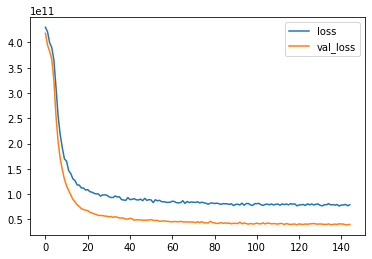

In [68]:
losses.plot()

### Evaluation on Test Data

In [69]:
predictions = model.predict(X_test)

In [70]:
mean_absolute_error(y_test,predictions)

116478.45941719714

In [71]:
np.sqrt(mean_squared_error(y_test,predictions))

200253.5209625533

In [72]:
df['price'].mean()

540296.5735055795

In [73]:
df['price'].median()

450000.0

### Predicting on a brand new house

In [65]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [74]:
model.predict(single_house)

array([[257726.62]], dtype=float32)

In [75]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64